# Exercise 0
a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.

In [5]:
import pandas as pd

# Read file and sheets
df_riket = pd.read_excel("../Laboration2/Data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Function to rename column names
def rename_columns(df):
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"][:len(df.columns)]
    return df

# If sheet_name is in sheets column name is changed on each sheet and DataFrame
for sheet_name, df in df_riket.items():
    if sheet_name in sheets:
        df_riket[sheet_name] = rename_columns(df)

b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [6]:
def calculate_f_grade(df, total_column, girls_column, boys_column):
    # Extract percentage of girls with grades A-E
    girls_percentage = float(str(df.iloc[0][girls_column]).replace(',', '.'))
    # Extract total number of girls with grades A-F
    total_girls_a_f = int(df.iloc[0][girls_column.replace('(A-E)', '(A-F)')])
    # Calculate number of girls with grade F
    girls_f = int((100 - girls_percentage) / 100 * total_girls_a_f)

    total_percentage = float(str(df.iloc[0][total_column]).replace(',', '.'))
    total_students_a_f = int(df.iloc[0][total_column.replace('(A-E)', '(A-F)')])
    total_f = int((100 - total_percentage) / 100 * total_students_a_f)

    boys_percentage = float(str(df.iloc[0][boys_column]).replace(',', '.'))
    total_boys_a_f = int(df.iloc[0][boys_column.replace('(A-E)', '(A-F)')])
    boys_f = int((100 - boys_percentage) / 100 * total_boys_a_f)
    return girls_f, total_f, boys_f

# Access the "Matematik" DataFrame
df_math = df_riket["Matematik"]

# Calculate the number of total, boys, and girls students who received an F in mathematics
total_f, boys_f, girls_f = calculate_f_grade(df_math, "Totalt (A-E)", "Pojkar (A-E)", "Flickor (A-E)")

print("Total number of students who received an F in mathematics:", total_f)
print("Number of boys who received an F in mathematics:", boys_f)
print("Number of girls who received an F in mathematics:", girls_f)

Total number of students who received an F in mathematics: 5797
Number of boys who received an F in mathematics: 11637
Number of girls who received an F in mathematics: 5824


c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

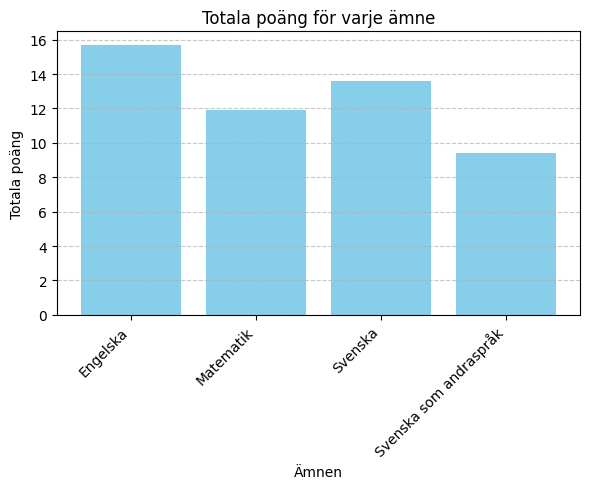

In [19]:
import matplotlib.pyplot as plt

def plot_total_points(df_dict):
    subjects = list(df_dict.keys())
    total_points = []

    for subject in subjects:
        # Ignore the last sheet "Rapportbeskrivning och def"
        if subject != "Rapportbeskrivning och def.":
            try:
                total_point = float(df_dict[subject].loc[0]["Totalt (poäng)"])
                total_points.append(total_point)
            except (ValueError, KeyError):
                # If column doesn't exist or the value can't convert to float. Set value to 0.
                total_points.append(0)  

    plt.figure(figsize=(6, 5))
    # Ignore last sheet
    plt.bar(subjects[:-1], total_points, color='skyblue')  
    plt.title('Totala poäng för varje ämne')
    plt.xlabel('Ämnen')
    plt.ylabel('Totala poäng')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_total_points(df_riket)

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.